# Visualize cross section from the predicted results

In [33]:
import os
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import seaborn as sns
import scipy.interpolate
import PyQt5
%matplotlib inline

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Global variables

In [34]:
# # Specific soil types
# assign_num_list = {'uncertain': 9,
#                     'topsoil layer': 8,
#                     'reclaimed layer': 7,
#                     'sedimentary layer': 6,
#                     'colluvial layer': 5,
#                     'weathered soil': 4,
#                     'weathered rock': 3,
#                     'soft rock': 2,
#                     'moderate rock': 1,
#                      'hard rock': 0,
#                   }

# Specific soil types
assign_num_list = {'uncertain': 0,
                    'topsoil layer': 1,
                    'reclaimed layer': 2,
                    'sedimentary layer': 3,
                    'colluvial layer': 4,
                    'weathered soil': 5,
                    'weathered rock': 6,
                    'soft rock': 7,
                    'moderate rock': 8,
                     'hard rock': 9,
                  }

labels = {}
for k, v in assign_num_list.items():
    labels[v] = k
    
label_colours = ['black', 'brown', 'red', 'magenta',
                'pink', 'yellow', 'green',
                'blue','cyan','silver']

### Load data .csv

In [35]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/output_results/export_dataframe.csv'

In [36]:
data = pd.read_csv(DATA_DIR)

In [37]:
data

,X,Y,Elevation,Target
0,549648,213758,80,9
1,549648,213758,85,9
2,549648,213758,90,9
3,549648,213758,95,9
4,549648,213758,100,0
...,...,...,...,...
13827,550968,213828,120,4
13828,550968,213828,125,5
13829,550968,213828,130,6
13830,550968,213828,135,6


### Extract cross section function

In [38]:
def extract_cross_section(inquiry_X = False, inquiry_Y= False, inquiry_elevation = False):
    if inquiry_X:
        print('Process X')
        temp_df = data.loc[data['X'] == inquiry_X]
    elif inquiry_Y:
        print('Process Y')
        temp_df = data.loc[data['Y'] == inquiry_Y]
    elif inquiry_elevation:
        temp_df = data.loc[data['Elevation'] == inquiry_elevation]
    else: 
        temp_df = data

    X = temp_df[['X','Y','Elevation']].to_numpy()
    soil_type = temp_df['Target'].to_numpy()
    return X, soil_type

### Plot functions

In [39]:
def plot_full_3D_points(x, y, labels, colours):
    
    sns.set(style = "darkgrid")

    fig = plt.figure(figsize=(20, 10))
    
    ax = fig.add_subplot(121, projection='3d')

    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
    ax = fig.add_subplot(122, projection='3d')
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
        ax.view_init(90, 0)   
        
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

In [40]:
def plot_cross_section(X, soil_type, inquiry = 'Y'):

    if inquiry == 'Y':
        x = X[:, 0]
    elif inquiry == 'X':
        x = X[:, 1]
        
    y = X[:, 2]
    z = soil_type
    
    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
    zi = rbf(xi, yi)    
    z_int = zi.astype(int)
    
    colors = label_colours
    bounds = [9,8,7,6,5,4,3,2,1,0]
    #     0,1,2,3,4,5,6,7,8,9]

    cmap = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)

    plt.imshow(z_int, vmin=0, vmax=8, origin='lower',
               extent=[x.min(), x.max(), y.min(), y.max()],
              cmap=cmap, norm=norm)

    ax.set_aspect('auto')
    plt.colorbar()
 
    # 
    if inquiry == 'Y':
        plt.xlabel('X')
        plt.ylabel('Elevation')
        plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section_Y.png')
    elif inquiry == 'X':
        plt.xlabel('Y')
        plt.ylabel('Elevation')
        plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section_X.png')
        
    plt.show()

## Visualize

In [41]:
X, soil_type = extract_cross_section(inquiry_X = False, inquiry_Y= False, inquiry_elevation = False)

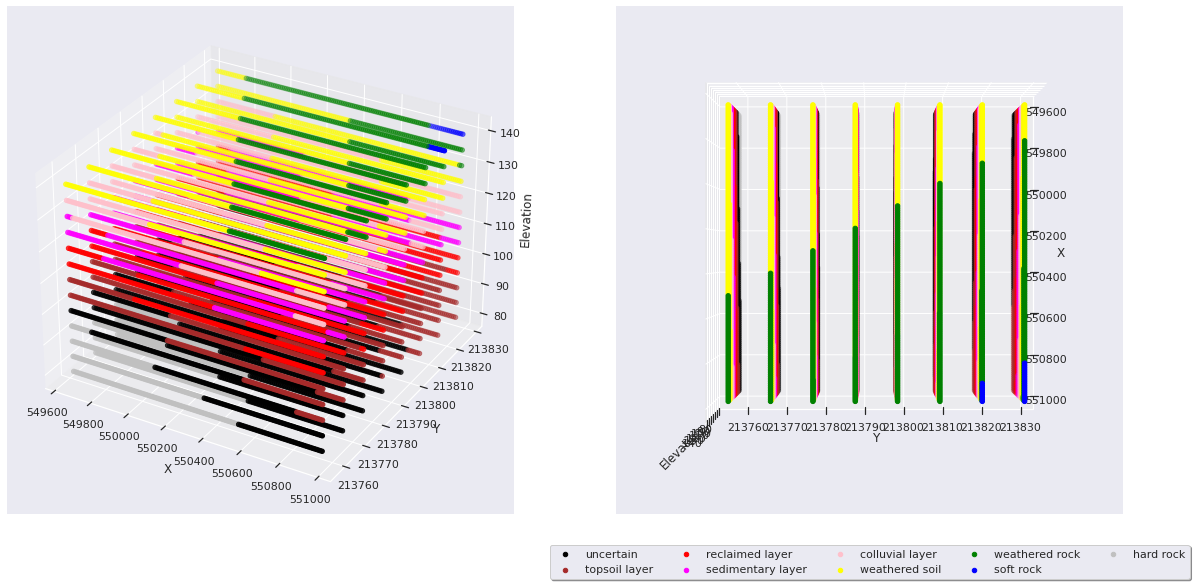

In [42]:
plot_full_3D_points(x = X, y = soil_type, labels = labels, colours=label_colours)

### **Inquiry Y Cross section**

In [43]:
X_cross_Y, soil_type_cross_Y = extract_cross_section(inquiry_Y = 213758)

Process Y


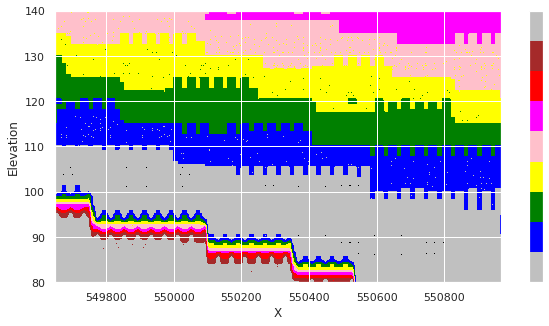

In [44]:
plot_cross_section(X_cross_Y, soil_type_cross_Y, inquiry = 'Y')
# plt.title('Cross section X-X at X = {}'.format(213900))


### **Inquiry X Cross section**

In [45]:
X_cross_X, soil_type_cross_X = extract_cross_section(inquiry_X = 549648)

Process X


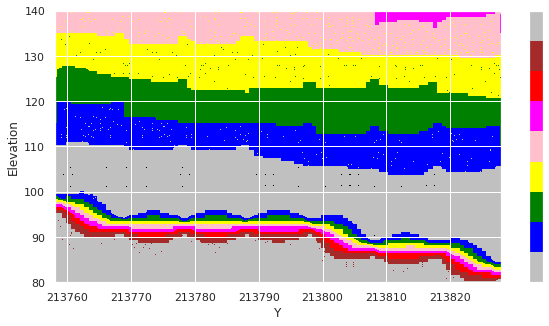

In [46]:
plot_cross_section(X_cross_X, soil_type_cross_X, inquiry = 'X')